# Adquirindo Dados

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go


In [2]:
yf_brent_oil = yf.download('BZ=F')
yf_brent_oil

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-07-30,75.849998,76.529999,75.440002,75.739998,75.739998,2575
2007-07-31,75.699997,77.169998,75.669998,77.050003,77.050003,3513
2007-08-01,77.000000,77.059998,74.860001,75.349998,75.349998,3930
2007-08-02,75.220001,76.209999,74.269997,75.760002,75.760002,6180
2007-08-03,75.389999,76.000000,74.529999,74.750000,74.750000,4387
...,...,...,...,...,...,...
2024-04-30,88.320000,88.709999,87.470001,87.860001,87.860001,39816
2024-05-01,85.959999,85.959999,83.290001,83.440002,83.440002,48165
2024-05-02,83.559998,84.419998,83.029999,83.669998,83.669998,39951


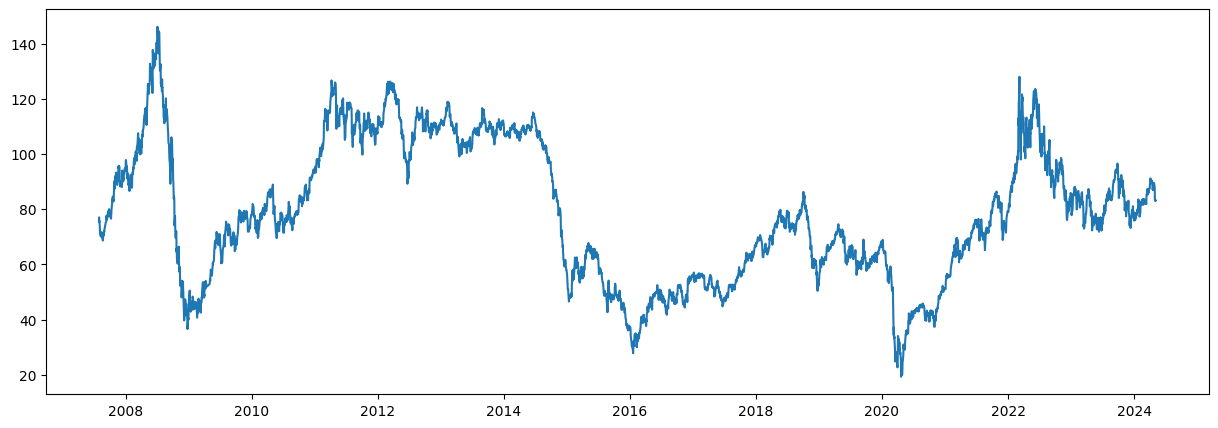

In [3]:
plt.figure(figsize=(15, 5))
plt.plot(yf_brent_oil['Close'])

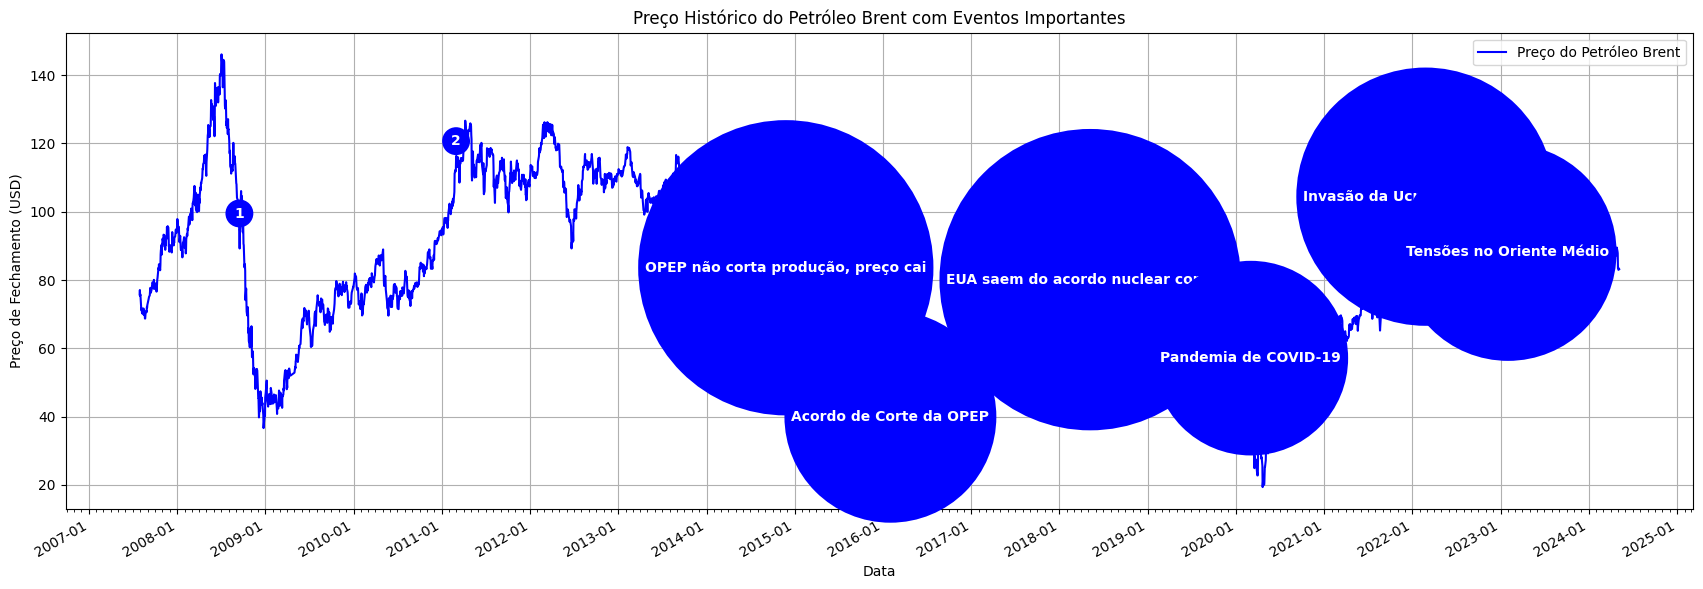

In [4]:
yf_brent_oil.index = pd.to_datetime(yf_brent_oil.index)

plt.figure(figsize=(21, 7))
plt.plot(yf_brent_oil.index, yf_brent_oil['Close'], label='Preço do Petróleo Brent', color='blue')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() # Rotação automática para melhorar a legibilidade

# Adicionando eventos significativos como anotações
events = {
    '2008-09-15': '1',
    '2011-03-01': '2',
    '2014-11-25': 'OPEP não corta produção, preço cai',
    '2016-02-01': 'Acordo de Corte da OPEP',
    '2018-05-08': 'EUA saem do acordo nuclear com Irã',
    '2020-03-03': 'Pandemia de COVID-19',
    '2022-02-24': 'Invasão da Ucrânia pela Rússia',
    '2023-02-01': 'Tensões no Oriente Médio'
}

for date, event in events.items():
    date = pd.to_datetime(date)
    if date in yf_brent_oil.index:
        plt.annotate(event, 
                     (date, yf_brent_oil.at[date, 'Close']),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontsize=10, weight='bold',
                     color='white', backgroundcolor='blue',
                     bbox=dict(boxstyle='circle,pad=0.5', facecolor='blue', edgecolor='none'))

# Melhorando a legibilidade
plt.title('Preço Histórico do Petróleo Brent com Eventos Importantes')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()


In [22]:
# Primeiro, vamos converter o índice para datetime, se necessário
yf_brent_oil.index = pd.to_datetime(yf_brent_oil.index)

# Criando o gráfico de linha para a série temporal
fig = go.Figure()
fig.add_trace(go.Scatter(x=yf_brent_oil.index, y=yf_brent_oil['Close'], mode='lines', name='Preço do Petróleo Brent'))

# Adicionando eventos significativos como círculos numerados
events = {
    '2008-09-15': 'Crise Financeira Global',
    '2011-03-01': 'Primavera Árabe',
    '2014-11-27': 'OPEP não corta produção, preço cai',
    '2016-01-01': 'Acordo de Corte da OPEP',
    '2018-05-08': 'EUA saem do acordo nuclear com Irã',
    '2020-03-01': 'Pandemia de COVID-19',
    '2020-04-20': 'Preços do WTI negativos',
    '2022-02-24': 'Invasão da Ucrânia pela Rússia',
    '2023-02-01': 'Tensões no Oriente Médio'
}

# Numerar os eventos para colocar dentro dos círculos
for i, (date, event) in enumerate(events.items(), 1):
    date = pd.to_datetime(date)
    if date in yf_brent_oil.index:
        close_price = yf_brent_oil.at[date, 'Close']
        offset_price = 155  # Ajuste este valor conforme necessário

        fig.add_trace(go.Scatter(
            x=[date, date],
            y=[close_price, offset_price],
            mode='lines',
            line=dict(color='blue', dash='dash'),
            showlegend=False
        ))

        # Adiciona o marcador numerado
        fig.add_trace(go.Scatter(
            x=[date],
            y=[offset_price],
            mode='markers+text',
            marker=dict(size=20, color='blue'),
            text=str(i),
            textposition='middle center',
            textfont=dict(color='white', size=10),
            showlegend=False
        ))

        # Adiciona uma linha tracejada conectando o marcador à série temporal


# Configurando o layout do gráfico
fig.update_layout(
    title='Preço Histórico do Petróleo Brent com Eventos Importantes (Numerados)',
    xaxis_title='Data',
    yaxis_title='Preço de Fechamento (USD)',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Mostrar o gráfico
fig.show()